# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

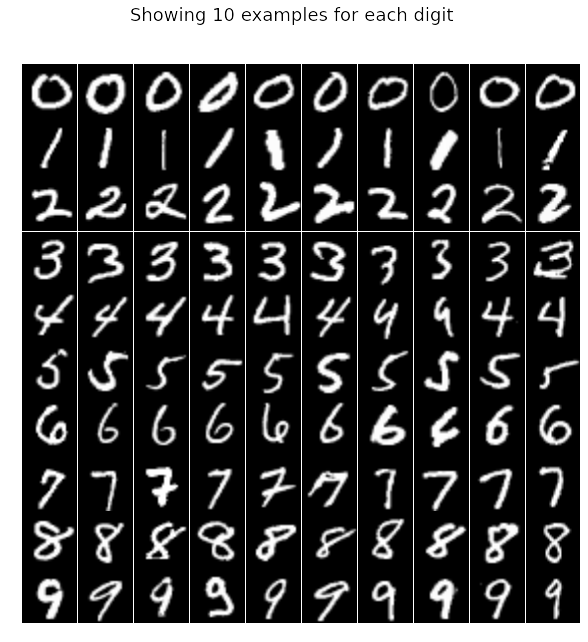

In [3]:
def P1(num_examples=10):

### STUDENT START ###

    num_digits = 10 # number of digits to show

    ## Select `num_examples` examples for each

    # Create index dictionary
    index_dict = { i : [] for i in xrange(num_digits) }
    digits_completed = 0

    # Iterate through labels
    for i, label in enumerate(train_labels):
        # If we are in need of the label we just came accross add it
        if len(index_dict[label]) < num_examples:
            index_dict[label].append(i)

            # If we have just finished the digit, add one to digits_completed
            if len(index_dict[label]) == num_examples:
                digits_completed += 1

                # When we have finished our 10 digits, stop iterating through labels
                if digits_completed == num_digits:
                    break

    ## Generate the figure
    fig, ax = plt.subplots(num_digits, num_examples, figsize=(10,10))

    for i in xrange(num_digits): # for each digit
        for j in xrange(num_examples): # for each plot within each digit
            # Get the position in the data
            _ind = index_dict[i][j]

            # Plot with no axes
            ax[i,j].imshow(train_data[_ind].reshape(28,28), cmap=plt.cm.gray)
            ax[i,j].axis('off')

    # Minor figure adjustments
    fig.suptitle('Showing {} examples for each digit'.format(num_examples), size=18)
    fig.subplots_adjust(wspace=.02, hspace=.02)

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values, extra=False):

### STUDENT START ###

    # For extra report
    extra_reports = []

    for k in k_values:
        # Create and train model
        _model = KNeighborsClassifier(n_neighbors=k)
        _model.fit(mini_train_data, mini_train_labels)
        
        # Predict
        _predicted = _model.predict(dev_data)
    
    ## Extra report comparing the overall performance of each of the models
        if extra:
            _p = classification_report(y_true=dev_labels, y_pred=_predicted, digits=3)
            
            # Report for k==1
            if k == 1:
                _p = classification_report(y_true=dev_labels, y_pred=_predicted, digits=3)
                print 'For k==1 neighbors:'
                print _p
            
            # Parse report (obtain prec, recall and F1 for avg / total)
            line = _p.split('\n')[-2]
            _1, precision, recall, f1, _2 = [x for x in line.split('  ') if len(x)]
            
            # Calculate accuracy and append to list
            _correct = sum([ i == j for i,j in zip(_predicted, dev_labels) ])
            accuracy = 1. * _correct / len(dev_labels)

            extra_reports.append( (k, accuracy, precision, recall, f1) )
    
    # Print extra report
    if extra:
        print '  MODEL      Accuracy  Precision   Recall  F1score'
        for entry in extra_reports:
            print 'Neighbors {0}:    {1:.1%}     {2}    {3}   {4}'.format(*entry)
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values, extra=True)

For k==1 neighbors:
             precision    recall  f1-score   support

        0.0      0.907     0.980     0.942        99
        1.0      0.890     1.000     0.942       105
        2.0      0.988     0.794     0.880       102
        3.0      0.773     0.872     0.820        86
        4.0      0.885     0.817     0.850       104
        5.0      0.927     0.835     0.879        91
        6.0      0.940     0.959     0.949        98
        7.0      0.889     0.920     0.904       113
        8.0      0.944     0.875     0.908        96
        9.0      0.777     0.821     0.798       106

avg / total      0.892     0.888     0.888      1000

  MODEL      Accuracy  Precision   Recall  F1score
Neighbors 1:    88.8%     0.892     0.888    0.888
Neighbors 3:    87.8%     0.887     0.878    0.878
Neighbors 5:    86.9%     0.877     0.869    0.869
Neighbors 7:    86.5%     0.875     0.865    0.865
Neighbors 9:    86.3%     0.875     0.863    0.863


ANSWER:  
**According to F1 score, the most difficult digit seems to be '9'.** Going back to the figure produced by P1, out of the examples shown '9' is indeed the most variable.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    print '  TRAIN SIZE   Accuracy   Precision   Recall  F1score    Time'

    for size in train_sizes:
        # Train model
        _model = KNeighborsClassifier(n_neighbors=1)
        _model.fit(train_data[:size], train_labels[:size])

        # Predict and time the prediction
        _start = time.time()
        _predicted = _model.predict(dev_data)
        _elapsed = time.time() - _start
        
        # Calculate accuracy and append to list
        _correct = sum([ i == j for i,j in zip(_predicted, dev_labels) ])
        accuracy = 1. * _correct / len(dev_labels)
        accuracies.append(accuracy)

        # Extra reporting
        _p = classification_report(y_true=dev_labels, y_pred=_predicted, digits=3)
        # Parse report (obtain prec, recall and F1 for avg / total)
        line = _p.split('\n')[-2]
        _1, precision, recall, f1, _2 = [x for x in line.split('  ') if len(x)]
        
        # Format time and print along with accuracies
        _t = str(_elapsed).split('.')
        print '{s:5} records:    {a:<.1%}      {p}    {r}   {f}  {t[0]:>2}.{t[1]:.2}s'.format(
            s=size, a=accuracy, p=precision, r=recall, f=f1, t=_t)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

  TRAIN SIZE   Accuracy   Precision   Recall  F1score    Time
  100 records:    72.0%      0.765     0.720    0.714   0.14s
  200 records:    78.6%      0.800     0.786    0.784   0.33s
  400 records:    84.1%      0.853     0.841    0.840   0.60s
  800 records:    88.4%      0.890     0.884    0.884   1.47s
 1600 records:    90.2%      0.905     0.902    0.902   2.85s
 3200 records:    92.6%      0.928     0.926    0.926   5.37s
 6400 records:    93.7%      0.938     0.937    0.937   9.32s
12800 records:    95.9%      0.959     0.959    0.959  20.39s
25000 records:    97.0%      0.970     0.970    0.970  38.44s


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
def P4(transform=False, size=60000):

### STUDENT START ###

    # Access data from P3 and reshape train sizes (to matrix)
    _ts = map( lambda x: [x,], train_sizes )
    
    # If specified, transform data
    if transform:
        _acc = map( lambda x: 1./(1 - x) , accuracies )
    else:
        _acc = accuracies
    
    # Fit model and predict for 600k
    _m = LinearRegression()
    _m.fit(_ts, _acc)
    pred = _m.predict([[size]])

    # If transformed, untransform data
    if transform:
        _pred = 1 -  1. / pred[0]
    else:
        _pred = pred[0]

    # Print result
    print 'Transformation {w:>3} -> Accuracy predicted (size={s}k): {p:>6.1%}'.format(
        w= 'ON' if transform else 'OFF', s=size/1000, p=_pred )

### STUDENT END ###

P4()
P4(transform=True)

Transformation OFF -> Accuracy predicted (size=60k): 124.3%
Transformation  ON -> Accuracy predicted (size=60k):  98.7%


ANSWER:  
The prediction yields accuracy > 1 because there is no restriction for the linear regression. We should apply a transformation on the accuracy so that we model an unconstrained variables (function of the accuracy), fit the regression on the transformed data, and then apply the inverse transformation to the predicted values to obtain the predicted accuracy.

The transformation applied is: $y = \frac{1}{1-x}$  
Whose inverse is: $x = 1 - \frac{1}{y}$

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

CONFUSION MATRIX
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


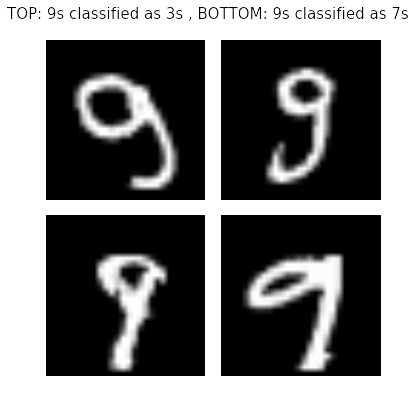

In [7]:
def P5():

### STUDENT START ###

    # Fit model and get predictions
    _m = KNeighborsClassifier(n_neighbors=1)
    _m.fit(mini_train_data, mini_train_labels)
    _p = _m.predict(dev_data)

    # Print confusion matrix
    print 'CONFUSION MATRIX'
    print confusion_matrix(y_true=dev_labels, y_pred=_p, labels= range(10))    

    # Print examples of mislabeled 9s (two 9s as 3s and two 9s as 7s)
    fig, ax = plt.subplots(2, 2, figsize=(6,6))
    
    _num_as3, _num_as7 = 0, 0 # aux for keeping track of examples plotted
    
    for i, label in enumerate(dev_labels):
        if label == 9:
            
            # If 9 mislabeled as 3
            if _p[i] == 3 and _num_as3 < 2:
                ax[0,_num_as3].imshow(dev_data[i].reshape(28,28), cmap=plt.cm.gray)
                ax[0,_num_as3].axis('off')
                _num_as3 += 1

            # If 9 mislabeled as 7
            if _p[i] == 7 and _num_as7 < 2:
                ax[1,_num_as7].imshow(dev_data[i].reshape(28,28), cmap=plt.cm.gray)
                ax[1,_num_as7].axis('off')
                _num_as7 += 1
            
            if _num_as3 + _num_as7 >= 4:
                break

    fig.suptitle('TOP: 9s classified as 3s , BOTTOM: 9s classified as 7s', size=15)
    fig.subplots_adjust(wspace=.1, hspace=.1)
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
class GaussianBlur:
    '''Implements a Gaussian Blur with the specified blur_range and std_deviation
    
    Attributes:
        blur_range [int]: Length of the blur's radius (Defaults to 1)
        std_dev [float]: Standard deviation of the Gaussian applied (Defaults to 1)
        weights [matrix of floats]: weights for the specified `blur_range` and `std_dev`
    
    '''
    
    def __init__(self, blur_range=1, std_dev=1):
        '''Initialize a GaussianBlur with specified blur length and standard deviation'''
        self.blur_range = blur_range
        self.std_dev = std_dev
        
        # Calculate weights
        self.weights = np.zeros([self.blur_range + 1, self.blur_range + 1])
        for i in xrange(self.blur_range + 1):
            for j in xrange(self.blur_range + 1):
                self.weights[i, j] = np.exp( -1. * (i**2 + j**2) / (2 * self.std_dev**2) ) \
                    / ( 2 * np.pi * self.std_dev**2 )

    def blur(self, matrix):
        '''Apply Gaussian Blur'''
        # Get matrix shape, initialize blurred matrix
        height, width = matrix.shape
        blurred = np.zeros_like(matrix)

        for r in xrange(height):
            for c in xrange(width):
                _vals = [] # collects values of neighbor pixels
                _weights = [] # collects the weights as specified by the Gaussian

                # get allowed set of jitters
                possible_rows = xrange( max(0, r - self.blur_range), min(height, r + self.blur_range + 1) )
                possible_cols = xrange( max(0, c - self.blur_range), min(width, c + self.blur_range + 1) )

                # iterate through jitters
                for _r in possible_rows:
                    for _c in possible_cols:
                        _vals.append( matrix[_r , _c] )
                        _weights.append( self.weights[abs(r - _r) , abs(c - _c)] )

                blurred[r][c] = np.dot(_vals, _weights) / sum(_weights)

        return blurred

In [9]:
def P6(blur_train=True, blur_dev=True):

### STUDENT START ###

    _start = time.time() # 'start' timer
    _m = KNeighborsClassifier(n_neighbors=1)
    
    # Initialize GaussianBlur if necessary
    if blur_train or blur_dev:
        gblur = GaussianBlur()

    # Blur (if specified) and train
    if blur_train:
        _train = map( lambda x: gblur.blur( x.reshape(28,28) ).flatten() , mini_train_data )
    else:
        _train = mini_train_data
    _m.fit(_train, mini_train_labels)

    # Blur (if specified) and predict
    if blur_dev:
        _dev = map( lambda x: gblur.blur( x.reshape(28,28) ).flatten() , dev_data )
    else:
        _dev = dev_data
    _predicted = _m.predict(_dev)
    
    _elapsed = time.time() - _start # 'stop' timer
    _t = str(_elapsed).split('.')
    
    # Calculate accuracy and print report
    _correct = sum([ i == j for i,j in zip(_predicted, dev_labels) ])
    accuracy = 1. * _correct / len(dev_labels)
    
    print '{tr:^16}    {dv:^12}      {a:.1%}   {t[0]:>2}.{t[1]:.2}s'.format(
        tr= 'ON' if blur_train else 'OFF',
        dv= 'ON' if blur_dev else 'OFF',
        a=accuracy, t=_t )

### STUDENT END ###

print 'Blurred Training    Blurred Dev    Accuracy    Time'
P6(blur_train=False, blur_dev=False)
P6(blur_train=False, blur_dev=True)
P6(blur_train=True, blur_dev=False)
P6(blur_train=True, blur_dev=True)

Blurred Training    Blurred Dev    Accuracy    Time
      OFF               OFF           88.8%    1.73s
      OFF                ON           87.5%   48.40s
       ON               OFF           90.5%   45.11s
       ON                ON           90.1%   90.08s


ANSWER:  
Given the results above, it seems clear that **blurring the training dataset improves accuracy** (my intuition is that the smoothing makes the dataset more generalizable).  
However, although the difference is quite small, it seems that it is better **not to smooth the dataset to predict**. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [10]:
def binarize(data, thresholds=[.5]):
    '''Split data into different classes given a set of thresholds (defaults to binarizing at .5)'''

    binarized_data = map( lambda d: np.digitize(d, thresholds), data )

    return binarized_data

In [11]:
rep_template = '{m:^15}  {th:^12}    {a:.1%}   {tm[0]:>2}.{tm[1]:.3}s'

def P7(thresholds):

### STUDENT START ###

    _start = time.time() # 'start' timer
    
    # Select Binomial or Multinomial
    if len(thresholds) == 1:
        mod = BernoulliNB(alpha=1., fit_prior=False)
    else:
        mod = MultinomialNB(alpha=1., fit_prior=False)

    # Train and fit (use binarize with .5, and alpha 1)
    mod.fit( binarize(mini_train_data, thresholds=thresholds) , mini_train_labels) 
    _p = mod.predict( binarize(dev_data,thresholds=thresholds) )

    _elapsed = time.time() - _start # 'stop' timer
    _t = str(_elapsed).split('.')
    
    # Calculate and report accuracy
    _correct = sum([ i == j for i,j in zip(_p, dev_labels) ])
    accuracy = 1. * _correct / len(dev_labels)
    
    print rep_template.format(
        m='BernoulliNB' if len(thresholds) == 1 else 'MultinomialNB',
        th=thresholds, a=accuracy, tm=_t)

### STUDENT END ###

# Report head
print '{:^15}  Threshold(s)  Accuracy    Time'.format('MODEL')

# BernoulliNB
P7([.5])
P7([.9])
P7([.1])
# MultinomialNB
P7([.33, .66])
P7([.1, .9])
P7([.4, .6])

     MODEL       Threshold(s)  Accuracy    Time
  BernoulliNB       [0.5]        81.5%    0.370s
  BernoulliNB       [0.9]        76.6%    0.309s
  BernoulliNB       [0.1]        81.2%    0.323s
 MultinomialNB   [0.33, 0.66]    80.1%    0.250s
 MultinomialNB    [0.1, 0.9]     79.8%    0.234s
 MultinomialNB    [0.4, 0.6]     80.0%    0.230s


ANSWER:  
After trying with several thresholds it seems that **multiclass does not improve results** (unless compared with a very high binarizing threshold). This may be due to the fact that it does not make sense to have three classes when our objects are just lines, and thus objects which should be able to have more different values. The *gray* class does not add any further information about the digit recorded (it might if we were classifying objects that had different colors or tonalities).

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
def P8(alphas):

### STUDENT START ###
    
    nb = BernoulliNB(binarize = .5, fit_prior=False) # initialize estimator
    gr_srch = GridSearchCV(nb, alphas)
    gr_srch.fit(mini_train_data, mini_train_labels) # fit grid search
    
    return gr_srch

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

## Report accuracies and scores for each alpha specified
print 'ALPHA   AVG-Score    SCORES'
for row in nb.grid_scores_:
    print "{0[alpha]:<6}   {1:5.1%}   [ {2[0]:5.1%}, {2[1]:5.1%}, {2[2]:5.1%} ]".format(*row)

/Library/Python/2.7/site-packages/sklearn/naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/Library/Python/2.7/site-packages/sklearn/naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


ALPHA   AVG-Score    SCORES
0.0       9.2%   [  9.2%,  9.3%,  9.1% ]
0.0001   81.7%   [ 84.6%, 80.2%, 80.2% ]
0.001    82.0%   [ 84.6%, 80.5%, 80.9% ]
0.01     82.1%   [ 84.6%, 80.5%, 81.2% ]
0.1      81.7%   [ 84.3%, 80.5%, 80.2% ]
0.5      80.0%   [ 81.7%, 79.0%, 79.3% ]
1.0      79.4%   [ 81.1%, 78.1%, 79.0% ]
2.0      78.4%   [ 81.1%, 76.6%, 77.5% ]
10.0     72.0%   [ 75.4%, 69.7%, 70.8% ]


In [13]:
print nb.best_params_

{'alpha': 0.01}


ANSWER:  
The best value for alpha is **0.01**. Given the accuracies obtained for alpha = 0, it seems there must be an error in the transformation since the values are disproportionately off. Additionally, the warning that pops up mentions division by zero.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [14]:
report_template = '{n}. {ap:>24}    {ac:>5.1%}'

def P9():
### STUDENT START ###
    """Trains a Gaussian Naive Bayes model (assumes P(x|y)~N(theta,sigma))
    
    Various approaches tested:
        1. Raw - using the gnb model as given
        2. Set theta and sigma based on the data's mean and std deviation
        3. Fix sigma to be 1
        4. Standardize data using the GNB's estimated theta and sigma
    
    NOTE: A fifth approach was tried, standardizing data according to the data's theta and sigma.
        However, the approach failed due to some sigma's being zero.
    """
    
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)

    # Record original params
    sigma_gnb = gnb.sigma_.copy()
    theta_gnb = gnb.theta_.copy()

    # Estimate data's mean and standard deviation
    sigma_data = sigma_gnb.copy()
    theta_data = theta_gnb.copy()
    for c in xrange(10):
        _filter = mini_train_labels == c
        sigma_data[c] = np.std(mini_train_data[ _filter ], axis=0)
        theta_data[c] = np.average(mini_train_data[ _filter ], axis=0)
    
## 1. Raw approach
    # Predict and get accuracies 
    _p = gnb.predict(dev_data)
    _correct = sum([ i == j for i,j in zip(_p, dev_labels) ])
    accuracy = 1. * _correct / len(dev_labels)
    
    # Print report
    print report_template.format(n=1, ap='Raw (no transform)', ac=accuracy)


## 2. Calculate std dev from the data and apply to sigma parameter
    gnb.theta_ = theta_data
    gnb.sigma_ = sigma_data

    # Predict and get accuracies 
    _p = gnb.predict(dev_data)
    _correct = sum([ i == j for i,j in zip(_p, dev_labels) ])
    accuracy = 1. * _correct / len(dev_labels)

    # Print report
    print report_template.format(n=2, ap="Data's parameters", ac=accuracy)


## 3. Fix sigma to be 1
    gnb.theta_ = theta_gnb  # revert
    gnb.sigma_ = np.ones_like(gnb.sigma_)

    # Predict and get accuracies 
    _p = gnb.predict(dev_data)
    _correct = sum([ i == j for i,j in zip(_p, dev_labels) ])
    accuracy = 1. * _correct / len(dev_labels)

    print report_template.format(n=3, ap='Fix Sigma=1' ,ac=accuracy)
    
    
## 4. Standardize data approach using original GNB's estimated theta and sigma
    std_mini_train_data = np.zeros_like(mini_train_data)
    for i, c in enumerate(mini_train_labels):
        std_mini_train_data[i] = (mini_train_data[i] - theta_gnb[c]) / sigma_gnb[c]

    std_dev_data = np.zeros_like(dev_data)
    for i, c in enumerate(dev_labels):
        std_dev_data[i] = (dev_data[i] - theta_gnb[c]) / sigma_gnb[c]


    gnb2 = GaussianNB()
    gnb2.fit(std_mini_train_data, mini_train_labels)
    _p = gnb2.predict(std_dev_data)
    _correct = sum([ i == j for i,j in zip(_p, dev_labels) ])
    accuracy = 1. * _correct / len(dev_labels)

    print report_template.format(n=4, ap='Standardize Data (GNB)', ac=accuracy)
 
    
### STUDENT END ###

print '            APPROACH          Accuracy'
print report_template.format(n=0, ap='BernoulliNB (P8)', ac=.821)
P9()

            APPROACH          Accuracy
0.         BernoulliNB (P8)    82.1%
1.       Raw (no transform)    62.1%
2.        Data's parameters     9.9%
3.              Fix Sigma=1    80.2%
4.   Standardize Data (GNB)    85.6%


/Library/Python/2.7/site-packages/sklearn/naive_bayes.py:393: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Library/Python/2.7/site-packages/sklearn/naive_bayes.py:395: RuntimeWarning: divide by zero encountered in divide
  (self.sigma_[i, :]), 1)
/Library/Python/2.7/site-packages/sklearn/naive_bayes.py:395: RuntimeWarning: invalid value encountered in divide
  (self.sigma_[i, :]), 1)


ANSWER:  
The different approaches play with the parameters that specifies the Gaussian that determines the likelihood of the features for a given class.  

The problem seems to be that some fo the features have a **std deviation of zero**, which does not play well with the Gaussian's analytic form. Therefore two approaches seem to solve the problem:  
1. Fixing $\sigma = 1$  
2. Standardizing using the estimated parameters by the GNB (which are close, but no sigma's are zero) helps produce data better fit for the GaussianNB assumptions.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

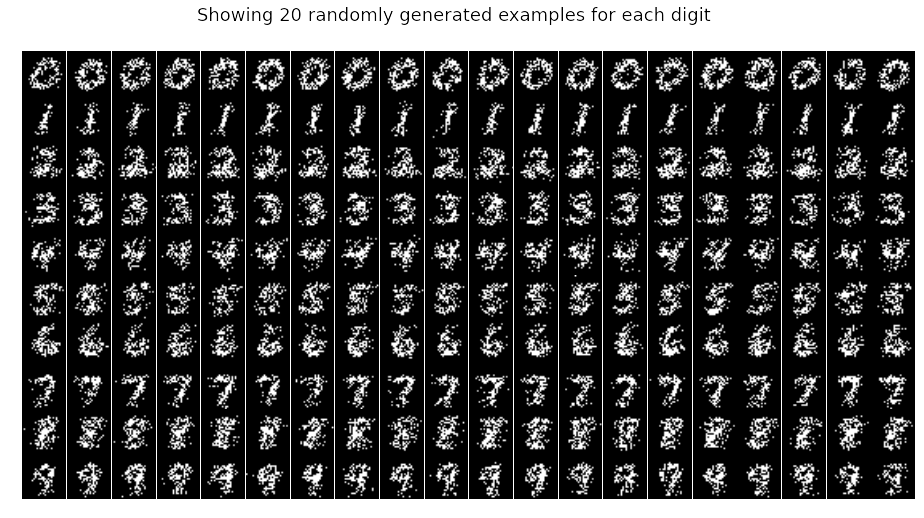

In [15]:
def P10(num_examples=20):

### STUDENT START ###
    num_digits = 10 # number of digits to show

    # Fit BernoulliNB model with alpha=0.01 (as per P8's response)
    bnb = BernoulliNB(alpha=0.01, binarize=.5, fit_prior=False)
    bnb.fit( mini_train_data , mini_train_labels) 
    
    ## Generate the figure
    fig, ax = plt.subplots(num_digits, num_examples, figsize=(16,8))

    for dig in xrange(num_digits): # for each digit
        for j in xrange(num_examples): # for each plot within each digit
            
            # Generate example by generating random numbers and using the model's probabilities to binarize
            _example = (np.random.rand(784) < np.exp(bnb.feature_log_prob_[dig])).reshape(28,28)

            # Plot with no axes
            ax[dig,j].imshow(_example, cmap=plt.cm.gray)
            ax[dig,j].axis('off')

    # Minor figure adjustments
    fig.suptitle('Showing {} randomly generated examples for each digit'.format(num_examples), size=18)
    fig.subplots_adjust(wspace=.02, hspace=.02)


### STUDENT END ###

P10(20)

ANSWER:  
From the plotted figure it can be observed that the generated examples **tend to be more homogeneous** than the training digits. These examples seem to be almost averages of the training examples, in which features distinctive of the number (like edges, or certain blan areas) are maintained, and other areas are noisier. Training examples are more crisp and clear, but vary more from one example to another.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [16]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # Fit BernoulliNB model with alpha=0.01 (as per P8's response)
    bnb = BernoulliNB(alpha=0.01, binarize=.5, fit_prior=False)
    bnb.fit( mini_train_data , mini_train_labels)
    _pred_prob = np.exp( bnb.predict_log_proba(dev_data) )
    
    # Get predicted probabilities and labels
    posterior_prob = np.max(_pred_prob, axis=1)
    predicted_label = np.argmax(_pred_prob, axis=1)
        
    # Update total and correct counts accordingly
    for i, p in enumerate(posterior_prob):  # for each prediction
        for j, b in enumerate(buckets):  # for each posterior bucket
            if p >= b:
                # add to total count
                total[j] += 1
                # check if correct
                if predicted_label[i] == dev_labels[i]:
                    correct[j] += 1
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

print '  POSTERIOR BUCKET    Accuracy  Total  Correct'
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = 1. * correct[i] / total[i]
    print 'P <= {:<15.13}    {:>5.1%}    {:>4d}      {:>3d}'.format(buckets[i],accuracy, total[i], correct[i])

  POSTERIOR BUCKET    Accuracy  Total  Correct
P <= 0.5                81.8%    1000      818
P <= 0.9                83.7%     970      812
P <= 0.999              87.3%     884      772
P <= 0.99999            90.1%     798      719
P <= 0.9999999          91.8%     743      682
P <= 0.999999999        93.1%     682      635
P <= 0.99999999999      93.9%     607      570
P <= 0.9999999999999    95.3%     529      504
P <= 1.0                95.8%     499      478


ANSWER:  
It seems that the classifier is somewhat **weakly calibrated**, since it has positive correlation between posterior probability and accuracy, but they do not coincide very well.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

## Brief Index
* [Additional Features](#Additional-Features)  
* [Implementation of Features](#Implementation-of-Features)  
* [Model Comparison](#Model-Comparison)
* [Final Model](#Final-Model)

### Additional Features

The following additional features where tested:  
* Sum of rows and columns  
* *Hough transform* for **straight line detection**  
* *Sobel filter* for **edge detection**  
* **Enclosed region detection** through *connectivity in labeled images* and *region detection*  
* *Histogram of Oriented Gradients* for counting **orientation of gradients** in each region
  

In [20]:
# Additional imports necessary for image processing
from skimage import exposure
from skimage.filters import sobel
from skimage.feature import canny, hog
from skimage.measure import label, regionprops

import matplotlib.patches as mpatches # for plotting regions

In [18]:
# Create index dictionary for an example of each digit
index_dict = {}

for i, lbl in enumerate(mini_train_labels):
    # If we are in need of the label we just came accross add it
    if lbl not in index_dict:
        index_dict[lbl] = i

        # When we have finished our 10 digits, stop iterating through labels
        if len(index_dict) >= 10:
            break

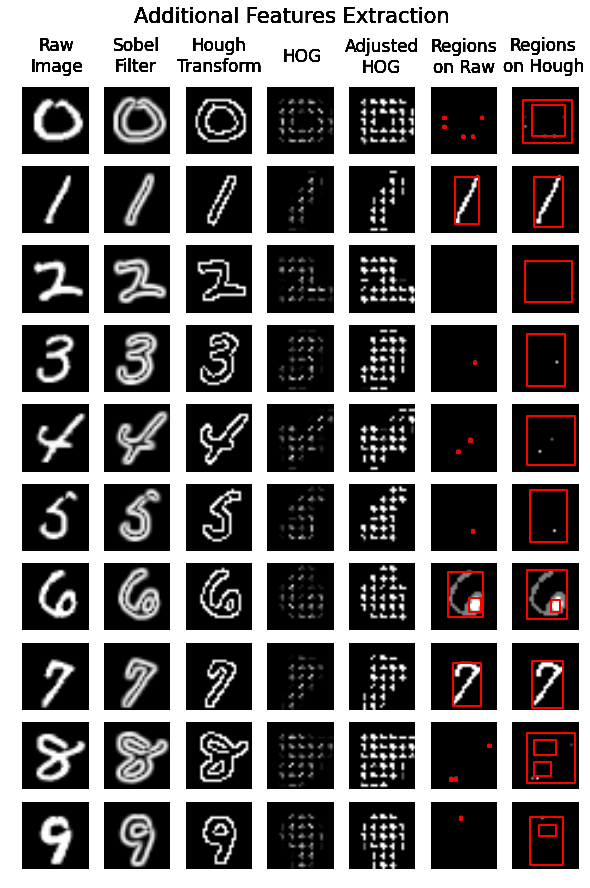

In [22]:
## PLOT EXAMPLES
fig, ax = plt.subplots(10, 7, figsize=(10,14))

for i in xrange(10): # for each digit

## Feature Extraction
    # Get the image, Sobel filter, Hough transform and Enclosed regions
    _img = mini_train_data[index_dict[i]].reshape(28,28)
    _sobel = sobel(_img)
    _hough = canny(_img, sigma=1.25)
    
    # Histogram of Oriented Gradients (HOG)
    _, _hog = hog(_img, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualise=True)
        # rescale HOG's histogram for better display
    _hog_adj = exposure.rescale_intensity(_hog, in_range=(0, 0.02))

    # Region detection on Raw
    _labeled = label(_img, connectivity=_img.ndim)
    _regions = regionprops(_labeled)

    # Region detection on Hough
    _labeled_hou = label(_hough, connectivity=_img.ndim)
    _regions_hou = regionprops(_labeled_hou)
    
    
## Plots (no axes)
    # Raw image
    ax[i,0].imshow(_img, cmap=plt.cm.gray)
    ax[i,0].axis('off')

    # Sobel Filter
    ax[i,1].imshow(_sobel, cmap=plt.cm.gray)
    ax[i,1].axis('off')

    # Hough Transform
    ax[i,2].imshow(_hough, cmap=plt.cm.gray)
    ax[i,2].axis('off')
    
    # HOG and adjusted-HOG
    ax[i,3].imshow(_hog, cmap=plt.cm.gray)
    ax[i,3].axis('off')
    ax[i,4].imshow(_hog_adj, cmap=plt.cm.gray)
    ax[i,4].axis('off')

    # Region on Raw
    ax[i,5].imshow(_labeled, cmap=plt.cm.gray)
    ax[i,5].axis('off')
    for reg in _regions:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = reg.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax[i,5].add_patch(rect)
    
    # Region on Hough (sigma=1)
    ax[i,6].imshow(_labeled, cmap=plt.cm.gray)
    ax[i,6].axis('off')
    for reg in _regions_hou:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = reg.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax[i,6].add_patch(rect)
    
    
    # Add column titles and figure title
    fig.text(.175,.915, 'Raw\nImage', ha='center', fontsize=17)
    fig.text(.285,.915, 'Sobel\nFilter', ha='center', fontsize=17)
    fig.text(.4,.915, 'Hough\nTransform', ha='center', fontsize=17)
    fig.text(.515,.925, 'HOG', ha='center', fontsize=17)
    fig.text(.625,.915, 'Adjusted\nHOG', ha='center', fontsize=17)
    fig.text(.74,.915, 'Regions\non Raw', ha='center', fontsize=17)
    fig.text(.85,.915, 'Regions\non Hough', ha='center', fontsize=17)
    
    fig.suptitle('Additional Features Extraction', fontsize=21)
        

### Implementation of Features  
We will try out a series of models, adding different subsets of the features

In [23]:
## AUXILIARY FUNCTIONS for cleaner model comparison

accuracy_header = '{m:^40}  {ac:^5}   {tm:^7}'.format(m='MODEL', ac='Accuracy', tm='Time')
accuracy_template = '{m:<40}    {ac:>5.1%}   {tm[0]:>2}.{tm[1]:.3}s'

def report_model(model_label, predicted, time_elapsed):
    ''' Reports the model accuracy and time of computation '''
    # Calculate accuracy
    _correct = sum([ i == j for i,j in zip(predicted, dev_labels) ])
    accuracy = 1. * _correct / len(dev_labels)
    
    # Process time
    _t = str(time_elapsed).split('.')
    
    # Print report
    print accuracy_template.format(m=model_label, ac=accuracy, tm=_t)


def transform_and_train(model_label, transformations):
    ''' Trains a model and gets predictions given the transformed data '''
    _start = time.time() # 'start' timer

    # Transform data (training and development)
    transformed_train = mini_train_data.copy()
    transformed_dev = dev_data.copy()
    for tr in transformations:
        transformed_train = map( tr, transformed_train )
        transformed_dev = map( tr, transformed_dev )
    
    # Train model and predict development data
    bnb = BernoulliNB(alpha=0.01, binarize=.5, fit_prior=False)
    bnb.fit( transformed_train , mini_train_labels)
    _predicted = bnb.predict(transformed_dev)

    # Report model performance
    _elapsed = time.time() - _start # 'stop' timer
    report_model(model_label, _predicted, _elapsed)


In [24]:
## FEATURE EXTRACTION 

# Sum of rows and columns
def sum_rows_cols(flat_array):
    _shaped_array = flat_array[:784].reshape(28,28)
    _rows = np.sum(_shaped_array, axis=0)
    _cols = np.sum(_shaped_array, axis=1)
    return np.concatenate([flat_array, _rows, _cols], axis=0)


# Sobel Filter
def sobel_filter(flat_array):
    _shaped_array = flat_array[:784].reshape(28,28)
    _sobel = sobel(_shaped_array).flatten()
    return np.concatenate([flat_array, _sobel], axis=0)


# Hough Transform
def hough_transform(flat_array):
    _shaped_array = flat_array[:784].reshape(28,28)
    _hough = canny(_shaped_array, sigma=1.25).flatten()
    return np.concatenate([flat_array, _hough], axis=0)


# HOG
def hog_transform(flat_array):
    _shaped_array = flat_array[:784].reshape(28,28)
    _, _hog = hog(_shaped_array, orientations=8, pixels_per_cell=(4, 4), 
                  cells_per_block=(1, 1), visualise=True)
    return np.concatenate([flat_array, _hog.flatten()], axis=0)


# Adusted HOG
def hog_adj_transform(flat_array):
    _shaped_array = flat_array[:784].reshape(28,28)
    _, _hog = hog(_shaped_array, orientations=8, pixels_per_cell=(4, 4), 
                  cells_per_block=(1, 1), visualise=True)
    _hog_adj = exposure.rescale_intensity(_hog, in_range=(0, 0.02))
    return np.concatenate([flat_array, _hog_adj.flatten()], axis=0)


# Regions on Hough - just adds number of regions
def regions_on_hough(flat_array):
    _shaped_array = flat_array[:784].reshape(28,28)
    _hough = canny(_shaped_array, sigma=1.25)
    _labeled_hou = label(_hough, connectivity=_img.ndim)
    _regions_hou = regionprops(_labeled_hou)
    return np.concatenate([ flat_array, [len(_regions_hou)] ], axis=0)


### Model Comparison  
... and finally the good stuff!

In [25]:
## MODEL COMPARISON
print accuracy_header

transform_and_train('BernoulliNB', transformations= [lambda x: x])

print '\n--- Single Feature Added ---'
transform_and_train('+ Sum of rows/columns', [sum_rows_cols])
transform_and_train('+ Sobel Filter', [sobel_filter])
transform_and_train('+ Hough Transform', [hough_transform])
transform_and_train('+ Histogram of Oriented Gradients', [hog_transform])
transform_and_train('+ Adjusted HOG', [hog_adj_transform])
transform_and_train('+ Regions on Hough', [regions_on_hough])

print '\n--- Two Features Added ---'
transform_and_train('+ Sum + Sobel', [sum_rows_cols, sobel_filter])
transform_and_train('+ Sum + Hough', [sum_rows_cols, hough_transform])
transform_and_train('+ Sum + Adj HOG', [sum_rows_cols, hog_adj_transform])
transform_and_train('+ Sum + Regions', [sum_rows_cols, regions_on_hough])
transform_and_train('+ Sobel + Hough', [sobel_filter, hough_transform])
transform_and_train('+ Sobel + Regions', [sobel_filter, regions_on_hough])
transform_and_train('+ Hough + Regions', [hough_transform, regions_on_hough])
transform_and_train('+ Adj HOG + Regions', [hog_adj_transform, regions_on_hough])

print '\n--- Multiple Features Added ---'
transform_and_train('+ Sum + Sobel + Regions', [sum_rows_cols, sobel_filter, regions_on_hough])
transform_and_train('+ Sum + Adj HOG + Regions', [sum_rows_cols, hog_adj_transform, regions_on_hough])
transform_and_train('+ Sobel + Adj HOG + Regions', [sobel_filter, hog_adj_transform, regions_on_hough])
transform_and_train('+ Sum + Sobel + Adj HOG + Regions',
                    [sum_rows_cols, sobel_filter, hog_adj_transform, regions_on_hough])


                 MODEL                    Accuracy    Time  
BernoulliNB                                 81.8%    0.359s

--- Single Feature Added ---
+ Sum of rows/columns                       82.8%    0.460s
+ Sobel Filter                              81.3%    1.375s
+ Hough Transform                           80.5%    4.702s
+ Histogram of Oriented Gradients           84.3%   99.276s
+ Adjusted HOG                              85.4%   100.855s
+ Regions on Hough                          81.8%    4.585s

--- Two Features Added ---
+ Sum + Sobel                               81.4%    1.225s
+ Sum + Hough                               81.2%    5.073s
+ Sum + Adj HOG                             85.1%   93.448s
+ Sum + Regions                             82.8%    4.491s
+ Sobel + Hough                             79.9%    5.393s
+ Sobel + Regions                           81.3%    5.703s
+ Hough + Regions                           80.5%    8.616s
+ Adj HOG + Regions                     

### Final Model  
The comparison above seemed to show that the best performance was obtained when adding just the Adjusted HOG and the Enclosed Region analysis.

Let's use the total training data and see performance on development data and holdout test as well.  

**NOTE:** Several training sizes were tested on the development dataset (similar to P3) to obtain the best accuracy possible with a reasonable time performance. (Final training size selected: 5k)

In [26]:
## FINAL MODEL Performance

# Final Model specification
train_size = 5000
transformations = [hog_adj_transform, regions_on_hough]
# transformations = [regions_on_hough]


_start = time.time() # 'start' timer

# Transform data (training, development and test)
transformed_train = train_data[:train_size].copy()
transformed_dev = dev_data.copy()
transformed_test = test_data.copy()
for tr in transformations:
    transformed_train = map( tr, transformed_train )
    transformed_dev = map( tr, transformed_dev )
    transformed_test = map( tr, transformed_test )

# Train model
bnb = BernoulliNB(alpha=0.01, binarize=.5, fit_prior=False)
bnb.fit( transformed_train , train_labels[:train_size])
_pred_dev = bnb.predict(transformed_dev)
_pred_test = bnb.predict(transformed_test)

# Process time
_elapsed = time.time() - _start # 'stop' timer
_minutes = str(_elapsed / 60).split('.')
_t = [ _minutes[0], float('.'+_minutes[1]) * 60 ]

# Calculate accuracies (on development and test data)
d_correct = sum([ i == j for i,j in zip(_pred_dev, dev_labels) ])
daccuracy = 1. * d_correct / len(dev_labels)

t_correct = sum([ i == j for i,j in zip(_pred_test, test_labels) ])
taccuracy = 1. * t_correct / len(test_labels)


# Final Report
print '{m:^30}   {dac:^9}  {tac:^9}  {tm:^7}'.format(m='MODEL', dac='Dev Acc.', tac='Test Acc.', tm='Time')
print '{m:<30}    {dac:>5.1%}     {tac:>5.1%}   {tm[0]:>2}m {tm[1]:.1f}s'.format(
    m='BernoulliNB + Adj HOG + Regions', dac=daccuracy, tac=taccuracy, tm=_t)


            MODEL                Dev Acc.   Test Acc.   Time  
BernoulliNB + Adj HOG + Regions    86.8%     86.4%   12m 33.4s
